In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the test task downloaded file
df = pd.read_csv(r'C:\Users\hp\Downloads\Copy of claims_sample_data - Sheet1.csv')

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52152 entries, 0 to 52151
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MONTH             52152 non-null  int64 
 1   SERVICE_CATEGORY  52152 non-null  object
 2   CLAIM_SPECIALTY   51901 non-null  object
 3   PAYER             52152 non-null  object
 4   PAID_AMOUNT       52152 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB
None


In [41]:
# Show the first few rows of the dataset
print(df.head())

    MONTH SERVICE_CATEGORY CLAIM_SPECIALTY    PAYER  PAID_AMOUNT
0  201801     AncillaryFFS             NaN  Payer F         4281
1  201801     AncillaryFFS             NaN  Payer H         2221
2  201801     AncillaryFFS             NaN  Payer O         3937
3  201801     AncillaryFFS             NaN  Payer W          268
4  201801     AncillaryFFS             ACH  Payer W          151


In [42]:
# Generate summary statistics
summary_stats = df.describe()
print(summary_stats)

               MONTH   PAID_AMOUNT
count   52152.000000  5.215200e+04
mean   201885.029567  3.708707e+03
std        72.867005  3.449842e+04
min    201801.000000 -4.223000e+04
25%    201808.000000  1.940000e+02
50%    201903.000000  5.860000e+02
75%    201911.000000  1.465000e+03
max    202007.000000  2.268611e+06


In [43]:
# frequency of each unique value in a column. getting idea of the distribution of categories within each column.
print(df['SERVICE_CATEGORY'].value_counts())
print(df['CLAIM_SPECIALTY'].value_counts())
print(df['PAYER'].value_counts())

SpecialistsFFS        12296
AncillaryFFS           9701
InpatientServices      9424
OutpatientServices     7582
ERServices             3696
ASCServices            2643
SNFServices            2501
SpecialistFFS          1684
PCPFFS                 1403
PCPEncounter           1222
Name: SERVICE_CATEGORY, dtype: int64
INTERNAL MEDICINE                   1227
FAMILY PRACTICE                     1128
GENERAL PRACTICE                     949
GENERAL SURGERY                      806
PATHOLOGY                            772
                                    ... 
PSYNUR                                 1
Physician/Ophthalmology                1
Registered Nurse First Assistant       1
PHGPM                                  1
NPAGRT                                 1
Name: CLAIM_SPECIALTY, Length: 905, dtype: int64
Payer F     9020
Payer CA    8681
Payer W     7105
Payer UN    6526
Payer O     6278
Payer S     4189
Payer CO    3677
Payer B     3631
Payer H     2360
Payer UL     685
Name: PAYER, 

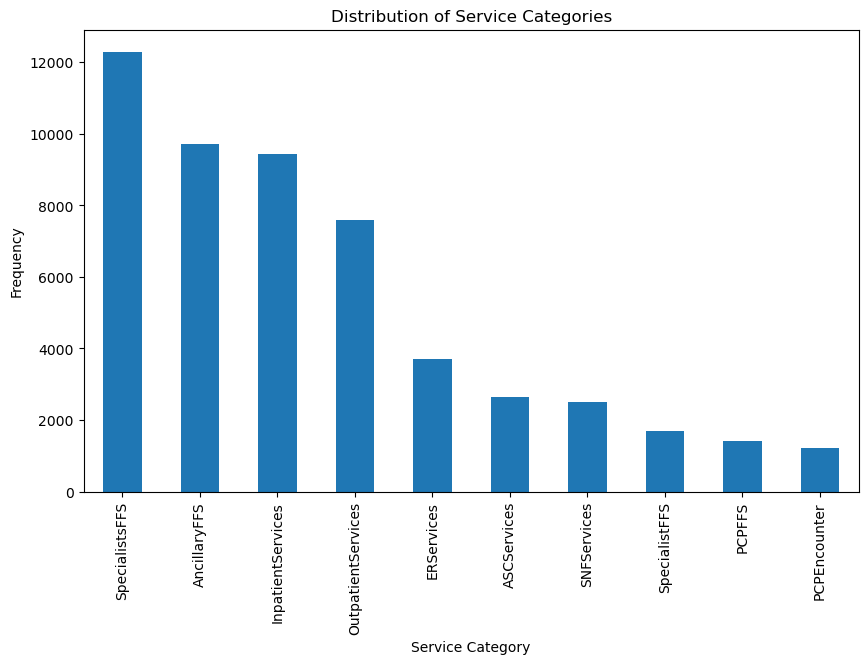

In [44]:
# Show Distribution of Service Categories
plt.figure(figsize=(10, 6))
df['SERVICE_CATEGORY'].value_counts().plot(kind='bar')
plt.title('Distribution of Service Categories')
plt.xlabel('Service Category')
plt.ylabel('Frequency')
plt.show()


In [45]:
# print out the unique values found in the column because of it's high cardinality to categorize afterwards
print(df['CLAIM_SPECIALTY'].unique())

[nan 'ACH' 'Advanced Registered Nurse Prac' 'ADVANCED RN PRACT'
 'AMBULANCE' 'Ambulance' 'AMBULANCE SERVICE' 'AMBULATORY SURGICAL CENTER'
 'Ambulatory Transportation Services' 'ANATOM' 'ANESTHESIOLOGY' 'ARNP'
 'BEHAVIORAL HEALTH COUNSELING' 'CARD ELECTROPHYSIOLO'
 'CARDIAC ELECTROPHYSIOLOGY' 'CARDIOLOGY' 'Cardiology'
 'Cardiology/Cardiovascular Disease' 'Cardiovascular Medicine'
 'CARDIOVASCULAR SURGERY' 'CCS' 'Chiropractic Medicine'
 'Clinical Medical Laboratory\t' 'Colon and Rectal Surgery'
 'COMMUNITY MENTAL HEALTH CENTER'
 'COMMUNITY MENTAL HEALTH CENTER/OTHER REHAB CENTER' 'CONV CARE CLINIC'
 'COVERING PHYSICIAN' 'CRITICAL ACCESS' 'CSW' 'DEFAULT' 'Dermatology'
 'DERMATOLOGY' 'DERMATOPATHOLOGY' 'Dermatopathology' 'DIABETES EDUCATOR'
 'DIAG X-RAY CLINIC' 'DIAGNOSTIC RADIOLOGY' 'Diagnostics' 'DIAL'
 'DIALYSIS' 'Dialysis' 'DIALYSIS CENTER' 'DISEASE MANAGEMENT'
 'DME & Medical Supplies, Oxygen Equip & Supplies' 'Doctor of Psychology'
 'DURABLE MED EQUIPMENT' 'DURABLE MEDICAL EQUIPMENT'

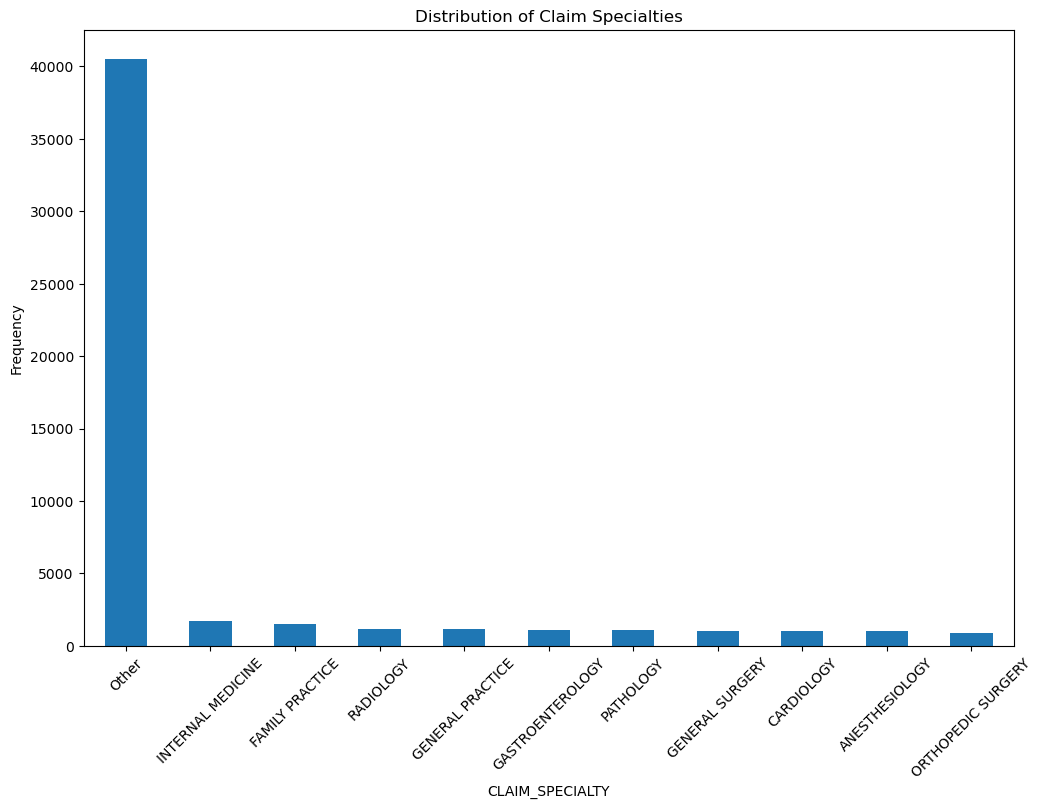

In [46]:
# Show Distribution of Claim Specialties
import matplotlib.pyplot as plt

# Clean and simplify labels
df['CLAIM_SPECIALTY'] = df['CLAIM_SPECIALTY'].str.upper().str.strip()

# Group less common specialties under 'Other'
top_n = 10  # number of top specialties to display
top_specialties = df['CLAIM_SPECIALTY'].value_counts().nlargest(top_n).index
df.loc[~df['CLAIM_SPECIALTY'].isin(top_specialties), 'CLAIM_SPECIALTY'] = 'Other'

plt.figure(figsize=(12, 8))
df['CLAIM_SPECIALTY'].value_counts().plot(kind='bar')
plt.title('Distribution of Claim Specialties')
plt.xlabel('CLAIM_SPECIALTY')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

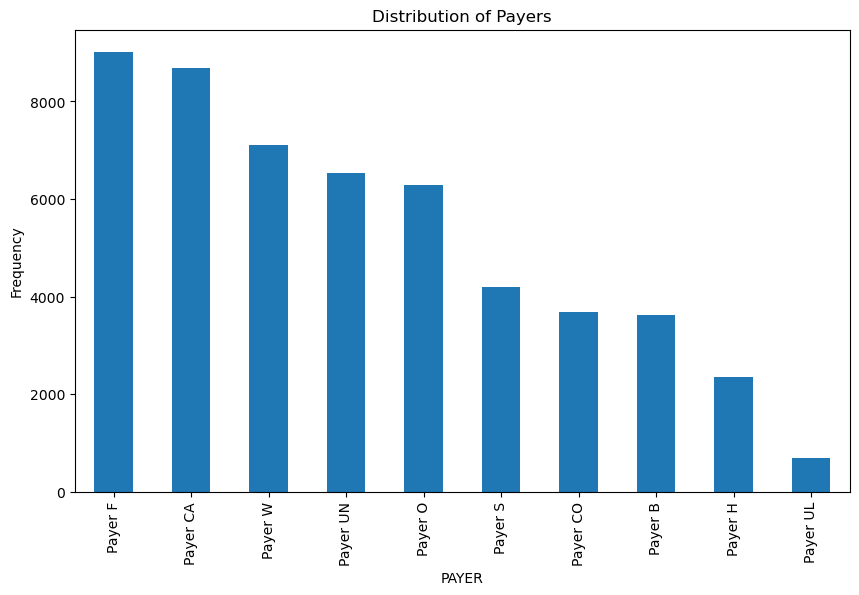

In [47]:
# Show Distribution of Payers
plt.figure(figsize=(10, 6))
df['PAYER'].value_counts().plot(kind='bar')
plt.title('Distribution of Payers')
plt.xlabel('PAYER')
plt.ylabel('Frequency')
plt.show()

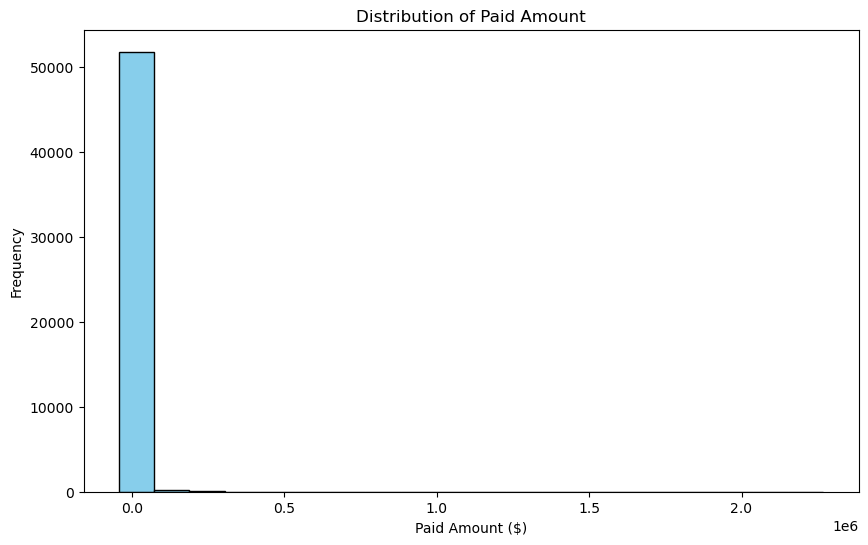

In [48]:
# Visualize trend/distribution of Paid Amount
plt.figure(figsize=(10, 6))
plt.hist(df['PAID_AMOUNT'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Paid Amount')
plt.xlabel('Paid Amount ($)')
plt.ylabel('Frequency')
plt.show()


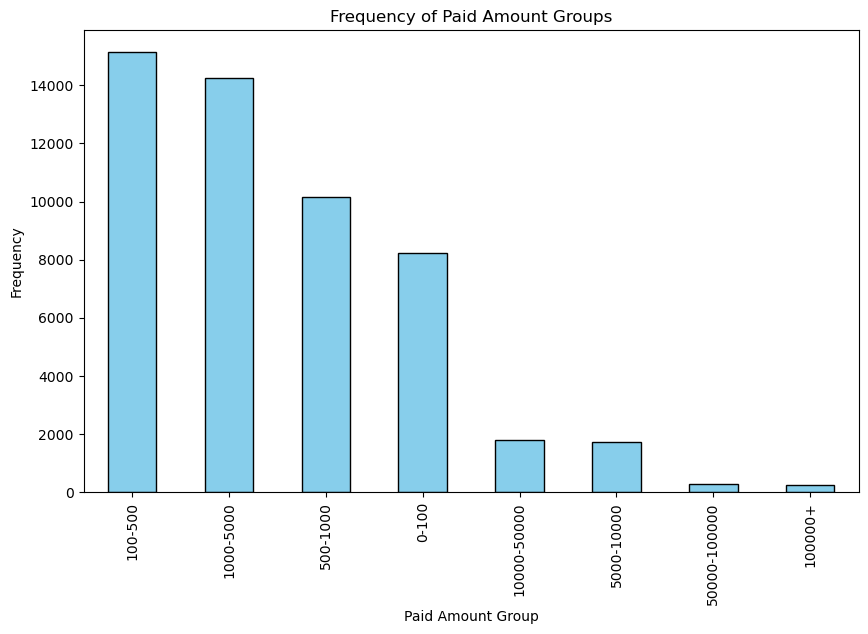

     CLAIM_SPECIALTY     PAYER    SERVICE_CATEGORY
504            Other   Payer F          ERServices
653            Other  Payer CA   InpatientServices
655            Other   Payer H   InpatientServices
657            Other   Payer W   InpatientServices
673            Other   Payer F   InpatientServices
674            Other   Payer O   InpatientServices
1022           Other   Payer F  OutpatientServices
2176           Other   Payer F          ERServices
2319           Other  Payer CA   InpatientServices
2321           Other   Payer H   InpatientServices


In [61]:
#Distribution of Paid Amount Ranges
import numpy as np
# Define the bins and labels
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, np.inf]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000+']

# Apply the bins to the 'PAID_AMOUNT' column
df['PAID_AMOUNT_GROUP'] = pd.cut(df['PAID_AMOUNT'], bins=bins, labels=labels, right=False)

# Count the frequency of each group
paid_amount_groups = df['PAID_AMOUNT_GROUP'].value_counts()

# Visualize the frequency of each group
plt.figure(figsize=(10, 6))
paid_amount_groups.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Paid Amount Groups')
plt.xlabel('Paid Amount Group')
plt.ylabel('Frequency')
plt.show()

# Identify claims with very high payments (e.g., '100000+')
high_payment_claims = df[df['PAID_AMOUNT_GROUP'] == '100000+']

# Now, investigate these claims further (e.g., check related services, providers, specialties)
high_payment_claims_info = high_payment_claims[['CLAIM_SPECIALTY', 'PAYER', 'SERVICE_CATEGORY']].head(10)
print(high_payment_claims_info)


In [64]:
# Calculate average payment amounts for each provider and specialty
avg_payment_by_provider = df.groupby('PAYER')['PAID_AMOUNT'].mean()
avg_payment_by_specialty = df.groupby('CLAIM_SPECIALTY')['PAID_AMOUNT'].mean()

# Identify providers with consistently higher or lower payments
high_payment_providers = avg_payment_by_provider[avg_payment_by_provider > avg_payment_by_provider.mean() + 2 * avg_payment_by_provider.std()]
low_payment_providers = avg_payment_by_provider[avg_payment_by_provider < avg_payment_by_provider.mean() - 2 * avg_payment_by_provider.std()]

# Identify specialties with consistently higher or lower payments
high_payment_specialties = avg_payment_by_specialty[avg_payment_by_specialty > avg_payment_by_specialty.mean() + 2 * avg_payment_by_specialty.std()]
low_payment_specialties = avg_payment_by_specialty[avg_payment_by_specialty < avg_payment_by_specialty.mean() - 2 * avg_payment_by_specialty.std()]

# Investigate the identified providers and specialties
print("Providers with Consistently Higher Payments:")
print(high_payment_providers)

print("\nProviders with Consistently Lower Payments:")
print(low_payment_providers)

print("\nSpecialties with Consistently Higher Payments:")
print(high_payment_specialties)

print("\nSpecialties with Consistently Lower Payments:")
print(low_payment_specialties)

#This information suggests that certain specialties, such as HOSPITAL, INP, OUT, and SNF, tend to have higher average payment
#amounts. This could be due to the nature of the services provided by these specialties.
# The output suggests that, based on the criteria (2 standard deviations above or below the mean), there are no providers or specialties that consistently have significantly higher or lower payments.
# This could mean that in dataset, providers and specialties do not show substantial variation in terms of average payment amounts when compared to the overall average and standard deviation.
# It's also possible that in dataset, the payments are relatively evenly distributed across providers and specialties.


Providers with Consistently Higher Payments:
Series([], Name: PAID_AMOUNT, dtype: float64)

Providers with Consistently Lower Payments:
Series([], Name: PAID_AMOUNT, dtype: float64)

Specialties with Consistently Higher Payments:
Series([], Name: PAID_AMOUNT, dtype: float64)

Specialties with Consistently Lower Payments:
Series([], Name: PAID_AMOUNT, dtype: float64)


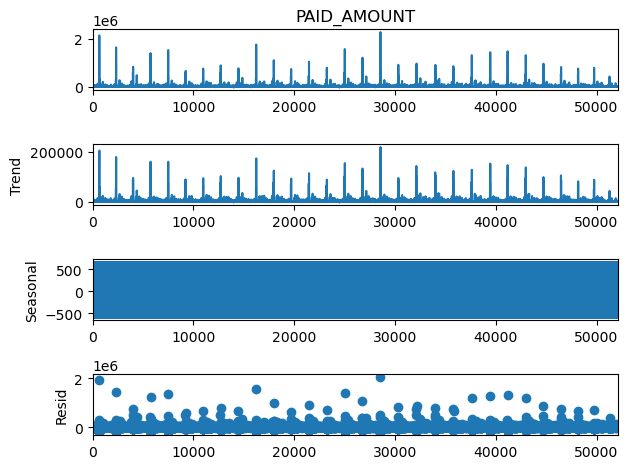

In [56]:
#Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Add a small constant to avoid zero values
result = seasonal_decompose(df['PAID_AMOUNT'] + 1e-10, model='additive', period=12)
result.plot()
plt.show()
#for decomposition additive model instead of a multiplicative one.which doesn't have the same restrictions as the multiplicative model regarding zero or negative values.

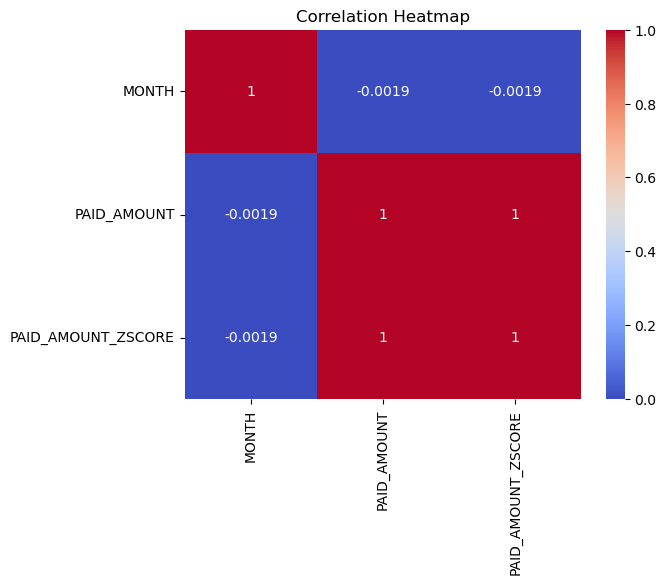

In [57]:
#Correlation Heatmap:
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [60]:
# Import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the Dash application
app = dash.Dash(__name__)

# Define the layout of the application with tabs
app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label='Interactive Dashboard', children=[
            html.H1("Interactive Dashboard"),
            
            dcc.Dropdown(
                id='service-dropdown',
                options=[
                    {'label': category, 'value': category} for category in df['SERVICE_CATEGORY'].unique()
                ],
                value=df['SERVICE_CATEGORY'].unique()[0]  # Default selected option
            ),
            
            html.Div(id='interactive-output')
        ]),
        dcc.Tab(label='Time Series Analysis', children=[
            html.H1("Time Series Analysis Dashboard"),
            
            dcc.Dropdown(
                id='time-period-dropdown',
                options=[
                    {'label': period, 'value': period} for period in df['MONTH'].unique()
                ],
                value=df['MONTH'].max()  # Default selected option (latest month)
            ),
            
            dcc.Graph(id='time-series-chart')
        ]),
        dcc.Tab(label='Outlier Detection', children=[
            html.H1("Outlier Detection Dashboard"),
            
            dcc.Dropdown(
                id='outlier-dropdown',
                options=[
                    {'label': category, 'value': category} for category in df['SERVICE_CATEGORY'].unique()
                ],
                value=df['SERVICE_CATEGORY'].unique()[0]  # Default selected option
            ),
            
            dcc.Graph(id='box-plot')
        ])
    ])
])

# Define a callback to update the output div based on dropdown selection
@app.callback(
    Output('interactive-output', 'children'),
    [Input('service-dropdown', 'value')]
)
def update_interactive_output(selected_category):
    filtered_df = df[df['SERVICE_CATEGORY'] == selected_category]
    average_payment = filtered_df['PAID_AMOUNT'].mean()
    return f'Average paid amount for {selected_category}: ${average_payment:.2f}'

# Define a callback to update the time series chart based on dropdown selection
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('time-period-dropdown', 'value')]
)
def update_time_series_chart(selected_period):
    filtered_df = df[df['MONTH'] == selected_period]
    
    # Create a time series chart using Plotly Express
    fig = px.line(filtered_df, x='MONTH', y='PAID_AMOUNT', title=f'Paid Amounts for {selected_period}')
    return fig

# Define a callback to update the box plot based on dropdown selection
@app.callback(
    Output('box-plot', 'figure'),
    [Input('outlier-dropdown', 'value')]
)
def update_box_plot(selected_category):
    filtered_df = df[df['SERVICE_CATEGORY'] == selected_category]
    
    # Create a box plot using Plotly Express
    fig = px.box(filtered_df, y='PAID_AMOUNT', title=f'Box Plot for {selected_category}')
    return fig

# Run the Dash application
if __name__ == '__main__':
    app.run_server(debug=True)
